<h1>Titanic - Machine Learning from Disaster 	&#128674;</h1>
<h2>A Kaggle Competition</h2>
<h3>Details</h3>
Explain a little more about the problem and the variables and put the link to the competion

### Import packages and data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
#Reding the test and train data set
df = pd.read_csv("./Data/train.csv")
test_submit_df = pd.read_csv("./Data/test.csv")

<h3>So, first let's take a look on the train data</h3>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
# Just to see the format and how is the dataframe is organized
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#Looking for how much missing are in this df
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3>So, first let's split data into train and test</h3>

In [34]:
X_train,X_test,y_train,y_test = train_test_split(df.drop("Survived",axis=1),df["Survived"],test_size=0.15,random_state=42)

<h2 style="color:#006600"> Working with the train dataset</h2>

###  Looking the distribuitions of data, mainly looking the age and fare statistics

In [35]:
X_train["Survived"] = y_train

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 599 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  757 non-null    int64  
 1   Pclass       757 non-null    int64  
 2   Name         757 non-null    object 
 3   Sex          757 non-null    object 
 4   Age          604 non-null    float64
 5   SibSp        757 non-null    int64  
 6   Parch        757 non-null    int64  
 7   Ticket       757 non-null    object 
 8   Fare         757 non-null    float64
 9   Cabin        166 non-null    object 
 10  Embarked     755 non-null    object 
 11  Survived     757 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 76.9+ KB


In [36]:
X_train[["Age","Fare"]].describe()

,Age,Fare
count,604.000000,757.000000
mean,29.549404,32.188391
std,14.472253,50.913062
min,0.420000,0.000000
25%,21.000000,7.925000
50%,28.000000,14.454200
75%,38.000000,30.500000
max,80.000000,512.329200


<h3>Looking close to the <i>Fare</i> variable

<AxesSubplot:>

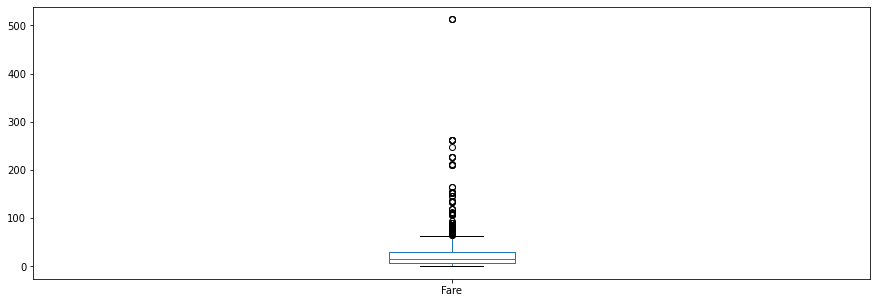

In [31]:
plt.Figure()
X_train["Fare"].plot(kind="box",figsize=(15,5))

Text(0.5, 0, 'Fare')

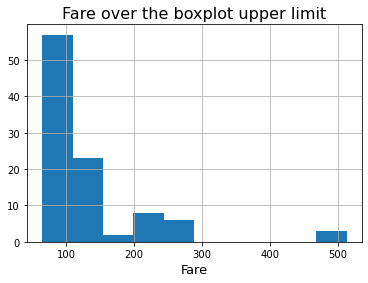

In [32]:
third_quantile = X_train["Fare"].quantile(0.75)
first_quantile = X_train["Fare"].quantile(0.25)
inter_quantile = third_quantile -first_quantile
plt.Figure()
X_train["Fare"][X_train["Fare"]>(third_quantile+1.5*inter_quantile)].hist()
plt.title("Fare over the boxplot upper limit",size=16)
plt.xlabel("Fare",size=13)

<p>13.3% of the Fare variable are over the boxplot upper limit. So, I decided to delete just the 3 max values (It represents 0,34%) and maintain the rest, as follows.

In [33]:
X_train.drop(train_df[train_df["Fare"]>400].index, inplace=True)
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
599,600,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
830,831,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
306,307,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
231,232,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.7750,NaN,S
845,846,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S


<h3>Looking close to the <i>Age</i> variable

<h4>Some ideas to complete the missing:</h4>
<ul>
    <li>Separate age for child < 10, teens < 18 , adults < 45, elders > 45 (Considering the epoch)
    <li>Get the title from Name column
    <li>To fill the cabin I could try put one model using -1 and other dropping this column
    <li>To fill the age I could get the mean value, fill with -1 or to use the name (or other column) to try infer some relation like use the average age by sex.
</ul>


<h2 style="color:#006600"> Working with the X_test dataset</h2>